In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. NC Well Metals/P1011.2. Analyses/P1011.2.3. ML Visualizations/P1011.2.3.2. Variable Importance Plots/Output')
cur_date = "040124"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in files
as_var_imp_df = data.frame(read_excel("Input/As_Variable_Importance_033024.xlsx"), Outcome = "Arsenic") 
mn_var_imp_df = data.frame(read_excel("Input/Mn_Variable_Importance_040124.xlsx"), Outcome = "Manganese") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# creating 1 df
var_imp_df = rbind(as_var_imp_df, mn_var_imp_df) %>%
    # only plotting for the first use case
    filter(Use_Case == 1) %>%
    # cleaning up the predictor names
    mutate(Predictor = gsub("_", " ", Predictor),
           Predictor = gsub(" Condensed", "", Predictor))

head(var_imp_df)

,Predictor,MeanDecreaseGini,Use_Case,Passed_Filter,Outcome
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Longitude,91.50081,1,Yes,Arsenic
2,Rock Type,40.50729,1,Yes,Arsenic
3,Casing Depth,35.09253,1,Yes,Arsenic
4,pH,34.35974,1,Yes,Arsenic
5,Latitude,30.48440,1,Yes,Arsenic
6,Well Depth,18.57035,1,Yes,Arsenic


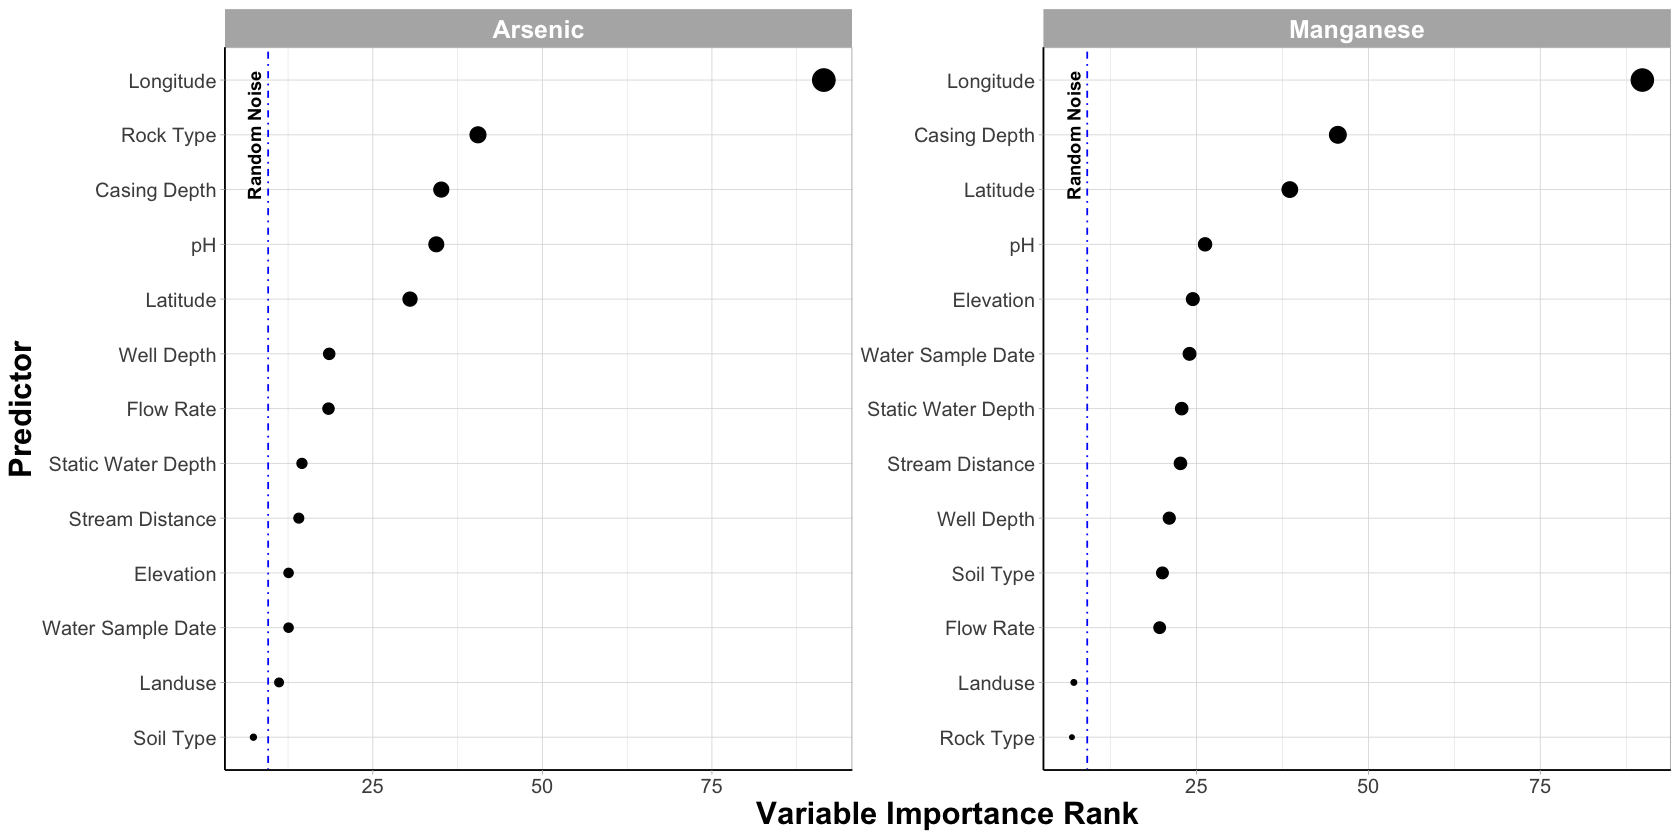

In [3]:
options(repr.plot.width=14, repr.plot.height=7) #changing size

ggplot() + 
  geom_point(data = var_imp_df %>%
                 filter(!grepl("noise", Predictor)), 
             aes(x = MeanDecreaseGini, y = reorder_within(Predictor, MeanDecreaseGini, Outcome), size = MeanDecreaseGini)) + 

  geom_vline(data = var_imp_df %>% 
             filter(MeanDecreaseGini > 9, grepl("noise", Predictor)),
                    aes(xintercept = MeanDecreaseGini), color = "blue", linetype = "dotdash") +

  #adding text to verticle background noise lines
  geom_text(data = var_imp_df %>% 
             filter(MeanDecreaseGini > 9, grepl("noise", Predictor)),
            aes(x = MeanDecreaseGini, label = "Random Noise\n", y = 12), angle = 90, fontface = "bold") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none")